# Data Scientist Job In United States

In [ ]:
This data set covers the job listings for Data Scientists in the United States. 

There are 10,000 jobs scraped from popular job boards via JobsPikr.deed website
Information collected are: Company Name, Position Name, Location, Job Description, url, 
job type (part/full time), and post dated.
California have the most data scientist job offer.
Graphs that compare job in Illinois and Missouri.

Import libraries

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from matplotlib import pyplot as plt


In [6]:
df = pd.read_csv('ds_job_posting.csv')

In [7]:
pd.set_option('max_columns', None)
df.head((10))

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,Usa,2019-02-05,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,Usa,2019-02-06,Job Title: - Sr. Data Science Consultant Durat...,Contract,NaN,dice,usa,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,Usa,2019-02-05,• 3+ years related a professional experience ...,Contract,NaN,dice,usa,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN


# Data Cleaning
Remove column by using drop()function

In [8]:
#remove columns crawl_timestamp, inferred_city,state,country, and colums with NaN. Didn't remove job_description and phone_number because it have data in some rows.

df.drop(['crawl_timestamp','geo', 'contact_email', 'job_description','inferred_city','cursor','inferred_state','inferred_country','salary_offered','html_job_description'], axis=1, inplace=True)

In [9]:
df.columns

Index(['url', 'job_title', 'category', 'company_name', 'city', 'state',
       'country', 'post_date', 'job_type', 'job_board', 'contact_phone_number',
       'uniq_id'],
      dtype='object')

## Simplifying Postion 
Using elif statement to narrow down job title and seniority

In [10]:
#simplify postions to a smaller spectrum by making new a new column 'position simpl'

def position_separation(job_title):
    if 'data scientist' in job_title.lower():
        return 'data scientist'
    elif 'data engineer'in job_title.lower():
        return 'data engineer'
    elif 'analyst' in job_title.lower():
        return 'analyst'
    elif 'deep learning' in job_title.lower():
        return 'deep learning'
    elif 'machine learning engineer'in job_title.lower():
        return 'mle'
    elif 'manger'in job_title.lower():
        return 'director'
    else: return 'na'
    


In [11]:
# defining seniority and adding new column as 'ranking'
def ranking(job_title):
    if 'sr' in job_title.lower()or 'senior' in job_title.lower()or 'sr' in job_title.lower()or 'lead' in job_title.lower()or 'principal' in job_title.lower():
        return 'senior'
    elif 'jr' in job_title.lower() or 'jr.' in job_title.lower():
        return 'jr'
    else:
        return 'na'

## Adding New Column Names 
positon_simpl and ranking

In [12]:
df['position_simpl'] = df['job_title'].apply(position_separation)
#Total count for jobs that's looking for data scientist.
df.position_simpl.value_counts()


data scientist    9999
analyst              1
Name: position_simpl, dtype: int64

In [13]:
#Total count of ranking job required (jr,sen,and na)

df['ranking'] = df['job_title'].apply(ranking)
df.ranking.value_counts()

na        6907
senior    3051
jr          42
Name: ranking, dtype: int64

## Sort by element


In [14]:
 #sort by 'state' column; states are listed in alphabetical order.
df.sort_values(by='state')

,url,job_title,category,company_name,city,state,country,post_date,job_type,job_board,contact_phone_number,uniq_id,position_simpl,ranking
7032,https://www.indeed.com/viewjob?jk=8e2c529ee750...,Data Scientist - Senior Associate,Computer-or-internet,"Guidehouse 13 reviews - Huntsville, AL",Huntsville,AL,US,2019-08-15,Undefined,indeed,NaN,088dba470d050c6b432681347d017026,data scientist,senior
5637,https://www.indeed.com/viewjob?jk=f02ae215dee9...,Data Scientist,Government-or-military,Company Info Follow Get job updates from Regio...,Birmingham,AL,US,2019-07-23,Undefined,indeed,NaN,c444f21b57f743e1e6b674597099c5f0,data scientist,na
7755,https://www.indeed.com/viewjob?jk=97f42388119e...,Sr. Data Scientist,Manufacturing-or-mechanical,"Regions Bank 2,376 reviews - Birmingham, AL",Birmingham,AL,US,2019-08-21,Undefined,indeed,NaN,5570a7eb8b7ab1fec23d0fcdfa681cd6,data scientist,senior
7775,https://www.indeed.com/viewjob?jk=4bf6472e888e...,"Data Scientist and Team Lead, Senior",Manufacturing-or-mechanical,"Booz Allen Hamilton 1,963 reviews",Huntsville,AL,US,2019-08-22,Undefined,indeed,NaN,6bf93c71837b89352156c8b9d09f31ae,data scientist,senior
5779,https://www.indeed.com/viewjob?jk=f52a816db67e...,Data Scientist (NSS),Computer-or-internet,IDEMIA,Huntsville,AL,US,2019-07-24,Undefined,indeed,NaN,93378a2ee3ad3c7ed1c6ad02f46c0def,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,2019-09-27,Full Time,Stackoverflow,NaN,e9f2ca58c7abcd4553a4a0be9602312e,data scientist,na
9996,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,2019-09-11,Full Time,Stackoverflow,NaN,efe05f2364ee3df943e952bc68ed95a7,data scientist,senior
9997,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,2019-09-03,Full Time,Stackoverflow,NaN,b980054dbb6d3fe1c6a421a237d1495f,data scientist,na
9998,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,2019-09-11,Full Time,Stackoverflow,NaN,4b86da9d2b24b87ec3c815d9072ad616,data scientist,senior


# Top Ten Company That Are Hiring

In [15]:
co_name=pd.value_counts(df['company_name'])
co_name_1=pd.DataFrame(co_name)

In [16]:
co_name_1.head((10))

,company_name
CyberCoders,628
Jefferson Frank,259
Nigel Frank International US,88
Taboola,77
Booz Allen Hamilton,77
Apex Systems,72
Kforce Technology,71
The Judge Group,67
Social Science Research Solutions (SSRS),67
Robert Half Technology,63


# Top Ten States With DS Job

In [17]:
sta_name=pd.value_counts(df['state'])
sta_name_1=pd.DataFrame(sta_name)
sta_name_1.head((10))

,state
CA,1485
NY,569
VA,511
TX,494
MA,477
IL,403
WA,344
NJ,310
PA,284
MD,238


In [18]:
sta_name=pd.value_counts(df['state'])
sta_name_1=pd.DataFrame(sta_name)

sta_name_1.to_csv('filteredstate.csv')
sta_name_1

,state
CA,1485
NY,569
VA,511
TX,494
MA,477
...,...
NE 68508,1
TX 77041,1
NN,1
TX 78205 (Downtown area),1


# DS Job In Illinois and Missouri

In [19]:
#import data
job = pd.read_csv('ds_job_posting.csv')

In [20]:
# separtate il and mo from 'state'
# comparsion of job avaliable bewtween il and mo

#df.loc[df['state'].str.contains('IL')
df[df['state']=='IL']
IL= df[df['state']=='IL']
mo= df[df['state']=='MO']

'CyberCoders','Jefferson Frank','Nigel Frank International', 'USTaboola Booz', 'Allen Hamilton', 'Apex Systems', 'Kforce Technology', 'The Judge Group', 'Social Science Research Solutions (SSRS)','Robert Half Technology']

In [21]:
# result of all job available in IL
IL

,url,job_title,category,company_name,city,state,country,post_date,job_type,job_board,contact_phone_number,uniq_id,position_simpl,ranking
55,https://www.dice.com/jobs/detail/Sr-Data-Scien...,Sr Data Scientist,NaN,"IT Associates, Inc.",Rosemont,IL,Usa,2019-02-06,Contract,dice,NaN,00f16318041f2cfadde34758b93ef6fe,data scientist,senior
58,https://www.dice.com/jobs/detail/Data-Engineer...,Data Engineer/Data Scientist (Python OR R AND ...,NaN,"IT Associates, Inc.",Des Plaines,IL,Usa,2019-02-06,Contract,dice,(630) 717-8000,3e137043376d8dcdfc0d95b74592344e,data scientist,na
111,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,CyberCoders,Melrose Park,IL,Usa,2019-02-07,Full Time,dice,NaN,1fab888130ff92e2be55e5e698b36919,data scientist,na
112,https://www.dice.com/jobs/detail/Machine-Learn...,Machine Learning Engineer/Data Scientist,NaN,Medline Industries Inc,Northfield,IL,Usa,2019-02-09,Full Time,dice,NaN,8fedc5642ff6e8a5ca530f96db117322,data scientist,na
115,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist ( healthcare ),NaN,"IT Associates, Inc.",Rosemont,IL,Usa,2019-02-07,Contract,dice,NaN,6671a90039150dd68a4de45f038cedca,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,https://www.theladders.com/job/principal-data-...,"Principal Data Scientist in Chicago, IL",Principal Data Scientist,Health Care Service Corporation,Chicago,IL,US,2019-09-26,Full Time,NaN,NaN,46edb770afa76c6848862d7fb8679538,data scientist,senior
9846,https://www.careerbuilder.com/job/J3R7ZG6WNW6G...,Chubb Global Risk Advisors\: Data Scientist Co...,NaN,Chubb Group of Insurance Companies,Chicago,IL,US,2019-09-27,Full Time,careerbuilder,NaN,6e53cd62c84ea98a79066f1ded444384,data scientist,na
9902,https://www.theladders.com/job/senior-regulato...,"Senior Regulatory Data Scientist in Chicago, IL",Senior Regulatory Data Scientist,CME Group,Chicago,IL,US,2019-09-27,Full Time,NaN,NaN,a76b82107395bdd84bd622285f726acd,data scientist,senior
9955,https://job-openings.monster.com/data-scientis...,Data Scientist/Principal Data Scientist,math jobs,Northrop Grumman,Rolling Meadows,IL,Usa,2019-09-30,Undefined,monster,NaN,cc8e86ac500ca05060d0efe51957c212,data scientist,senior


In [22]:
state_count= [IL.shape[0],mo.shape[0]] 
state_count

[403, 121]

In [23]:
#create variable for IL and Mo for x-axis
state_name=['IL','MO']
state_name

['IL', 'MO']

In [24]:
#use NumPy.arange() to find y-axis
yaxis = np.arange(len(state_name))

# Bar Graph

Text(0.5, 0, 'State')

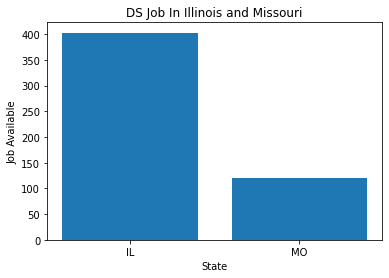

In [25]:
state_count = [403,121]

plt.xticks(yaxis,state_name)
plt.title("DS Job In Illinois and Missouri")
plt.bar(yaxis,state_count)
plt.ylabel('Job Available')
plt.xlabel('State')

Text(0.5, 0, 'job avaible')

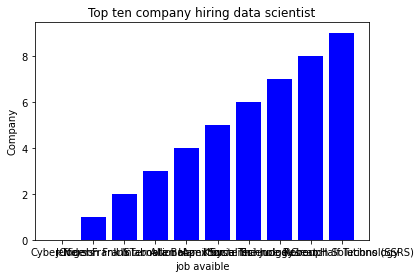

In [27]:
x= ['CyberCoders','Jefferson Frank','Nigel Frank International', 'USTaboola Booz', 'Allen Hamilton', 'Apex Systems', 'Kforce Technology', 'The Judge Group', 'Social Science Research Solutions (SSRS)','Robert Half Technology']
job = [628, 259, 88, 77, 77, 72, 71, 67, 67, 63]
job = [i for i, _ in enumerate(x)]
plt.xticks(x_co,x)
plt.title('Top ten company hiring data scientist')
plt.bar(x_co, job, color='blue')
plt.ylabel('Company')
plt.xlabel('job avaible')

# Pie Graph

<function matplotlib.pyplot.show(close=None, block=None)>

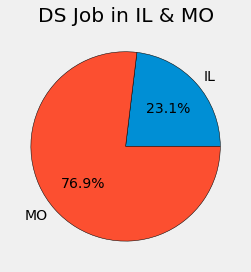

In [28]:
plt.style.use('fivethirtyeight')
slices = [121,403]
labels = ['IL','MO',]
colors =['red','pink']
plt.pie(slices, labels=labels,autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title('DS Job in IL & MO')
plt.tight_layout()
plt.show

In [29]:
job_post = {
    'title': ['Data Scientist','Senior Data Scientist','Sr. Data Scientist','Lead Data Scientist','Principal Data Scientist','Other'],
    'job': [2889,6440,203,178,148,320]
}

# Swam Plot
Number of jobs that are avaliable in the CA,NY,VA,TX,MA*

In [30]:
new_job_post=pd.DataFrame(job_post)
new_job_post

,title,job
0,Data Scientist,2889
1,Senior Data Scientist,6440
2,Sr. Data Scientist,203
3,Lead Data Scientist,178
4,Principal Data Scientist,148
5,Other,320


<AxesSubplot:xlabel='job', ylabel='title'>

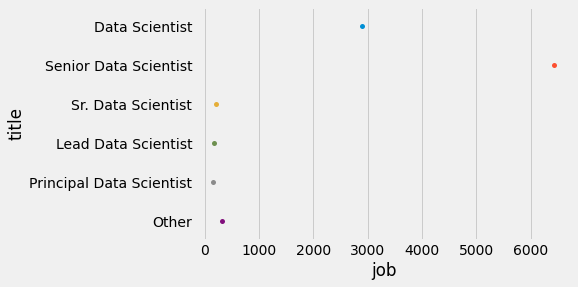

In [31]:
sns.swarmplot(x='job', y='title', data= new_job_post)

In [32]:
co_name=pd.value_counts(df['company_name'])
co_name_1=pd.DataFrame(co_name)

co_name_1.to_csv('filtered.csv')
co_name_1

,company_name
CyberCoders,628
Jefferson Frank,259
Nigel Frank International US,88
Taboola,77
Booz Allen Hamilton,77
...,...
Infinite Computer Solutions Inc,1
Argonne National Lab,1
Chipotle,1
"Advent Global Solutions, Inc.",1


In [33]:
co_name_1.head((10))


,company_name
CyberCoders,628
Jefferson Frank,259
Nigel Frank International US,88
Taboola,77
Booz Allen Hamilton,77
Apex Systems,72
Kforce Technology,71
The Judge Group,67
Social Science Research Solutions (SSRS),67
Robert Half Technology,63


In [35]:
df.sort_values(by='post_date')


,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
1433,2019-04-02 08:09:02 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist,math jobs,LRS,NaN,NaN,Usa,NaN,NaN,NaN,2018-05-24,Our client is in need of a Data Scientist. Thi...,Undefined,NaN,monster,usa,1554195619436814,NaN,NaN,e1dc252a37132518dc3eeaf6efe5728e,NaN
3492,2019-06-26 22:09:41 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist with Polygraph,social science jobs,Leidos,MCLEAN,VA,Usa,Mclean,Virginia,United states,2018-07-25,Description: \n Leidos is seeking a Data Scie...,Undefined,NaN,monster,usa,1561590019580762,NaN,NaN,619e9a215731fcabe095e05a62c07c13,NaN
2087,2019-04-27 06:38:22 +0000,https://job-openings.monster.com/data-scientis...,"Data Scientist, Machine Learning for an Automo...",math jobs,OSI Engineering,NaN,NaN,Usa,NaN,NaN,NaN,2018-08-13,"Data Scientist, Machine Learning for an Automo...",Full Time,NaN,monster,usa,1556352024198885,NaN,NaN,50ee90c6bc79819d2bfd9a91cc34e34e,NaN
1429,2019-04-02 08:01:03 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist*,math jobs,Odyssey Systems Consulting Group,NaN,NaN,Usa,NaN,NaN,NaN,2018-10-03,The Cyber Analytics and Decision Systems group...,Undefined,NaN,monster,usa,1554195619267829,NaN,NaN,0aa952f7707ee5b3344b4c70d34a2d71,NaN
1223,2019-03-20 07:50:00 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist - Operations Research,automotive,Carvana,NaN,NaN,Usa,NaN,NaN,NaN,2018-10-12,"ABOUT CARVANA... \n At Carvana, we sell cars,...",Undefined,NaN,monster,usa,1553072423063855,NaN,NaN,5f500d59af80737196a1f994d0b1d5fa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,2019-10-01 02:54:41 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,computer jobs,CyberCoders,San Francisco,CA,Usa,San francisco,California,United states,2019-09-30,Senior Data Scientist \n Senior Data Scientist...,Undefined,NaN,monster,usa,1569902445908059,NaN,NaN,e8e03644fb8350ad4aeef1bf09fcbc77,Senior Data Scientist <div><!--START_SECTION_1...
9974,2019-10-01 02:57:31 +0000,https://job-openings.monster.com/sr-data-scien...,Sr. Data Scientist,computer jobs,APC,Chapel Hill,NC,Usa,Chapel hill,North carolina,United states,2019-09-30,We are actively seeking a Senior Data Scientis...,Full Time,NaN,monster,usa,1569902446090433,NaN,NaN,576a2fe7f4be5692703d63306f232e07,<span id='TrackingJobBody' name='TrackingJobBo...
9964,2019-10-01 01:18:16 +0000,https://www.careerbuilder.com/job/J3M0V25X113B...,Senior Data Scientist,NaN,"TEKsystems, Inc",Charlotte,NC,US,Charlotte,North carolina,United states,2019-09-30,This role is at one of the leading financial i...,Full Time,NaN,careerbuilder,usa,1569895263834441,NaN,NaN,a1d66dc4668335c23782db07cfc2b8d8,<strong>Job Description</strong>\n<p>This role...
9960,2019-10-01 01:16:07 +0000,https://www.careerbuilder.com/job/J3W0HL647TKL...,AWS Big Data - Data Scientist - Chicago,NaN,Jefferson Frank,Chicago,IL,US,Chicago,Illinois,United states,2019-09-30,Data Scientist - Chicago Skills and Experience...,Full Time,NaN,careerbuilder,usa,1569895261357010,NaN,NaN,09ada0bbbe0f8a4e9d2986d96b0c7587,<strong>Job Description</strong>\n<p><strong>D...


In [ ]:
import datetime

# create data
y = [ 2,4,6,8,10,12,14,16,18,20 ]
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(len(y))]

# plot
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

In [34]:
df = pd.read_csv('ds_job_posting.csv')
df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,United states,2019-09-27,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,United states,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,United states,2019-09-03,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,United states,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [ ]:
df['crawltimestamp']